In [39]:
#### Additional examples - bassin hopping 

(120, 120)


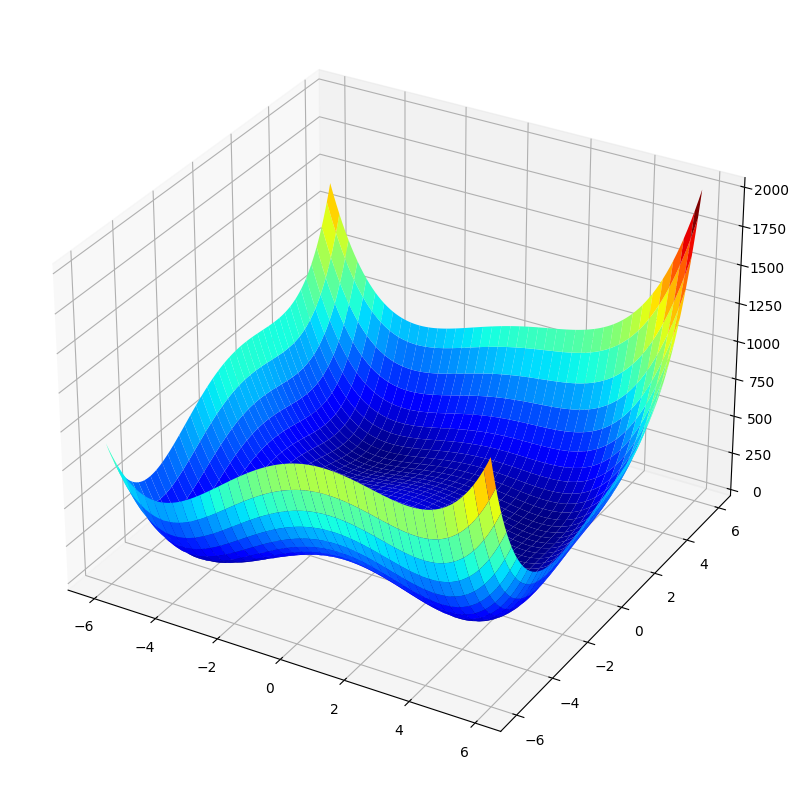

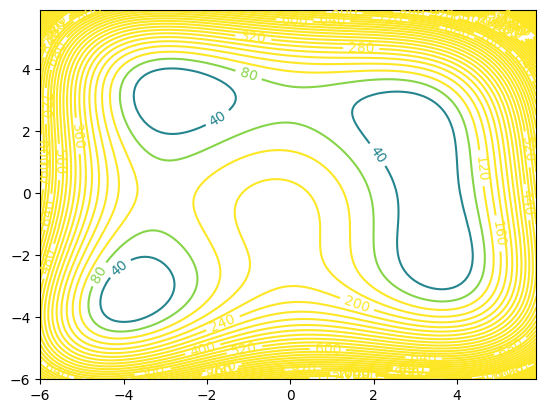

[ 5.53568796 -3.5625947 ]
global minimum: x = [3.584428, -1.848127], f(x) = 0.000000


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as optim
import random
def fun1(x):
#    return (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) 
#            - np.exp(0.5 * (np.cos(2.0 * np.pi * x[0]) +
#            np.cos(2 * np.pi * x[1]))) + np.exp(1) + 20)
     return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2

#[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126].

r_min, r_max = -6.0, 6.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
X, Y = np.meshgrid(xaxis, yaxis)
x = [X,Y]
results = fun1(x)
print(results.shape)

figure = plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.plot_surface(X, Y, results, cmap='jet',shade='false')
plt.show()

fnp = plt.contour(X,Y,results,60,vmin=-10, vmax=100)
#fnp = plt.contour(X,Y,results,20)
plt.clabel(fnp, inline=1, fontsize=10)
plt.show()

pt = r_min + np.random.rand(2) * (r_max - r_min)
print(pt)
sol = optim.basinhopping(fun1, pt, stepsize=0.5, niter=200)
#print('Status : %s' % result['message'])
#print('Total Evaluations: %d' % sol['nfev'])

print("global minimum: x = [%.6f, %.6f], f(x) = %.6f" % (sol.x[0],sol.x[1],sol.fun))

In [41]:
#### Minimize under constraints

Function is given as:

$f(x,y) = -(2xy + 2x -x^{2}-2y^{2})$

subject to the constraints:

$y = x^{3}$;

$y \ge (x-1)^{4}+2$

$x \in [0.5, 1.5]$

$y \in [1.5, 2.5]$

In [42]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

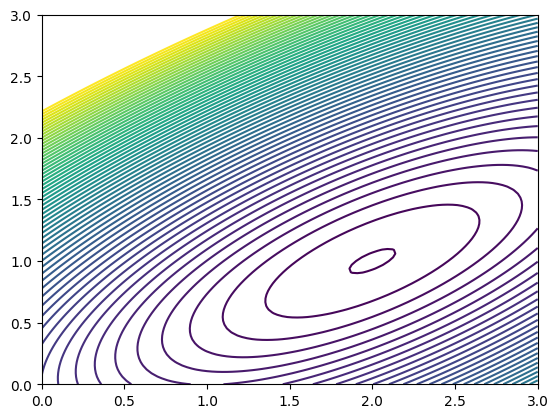

In [43]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 0.2));

In [44]:
x0 = [0, 2.5]

In [45]:
import scipy as sp

unc_opt = sp.optimize.minimize(f, x0, constraints=None)

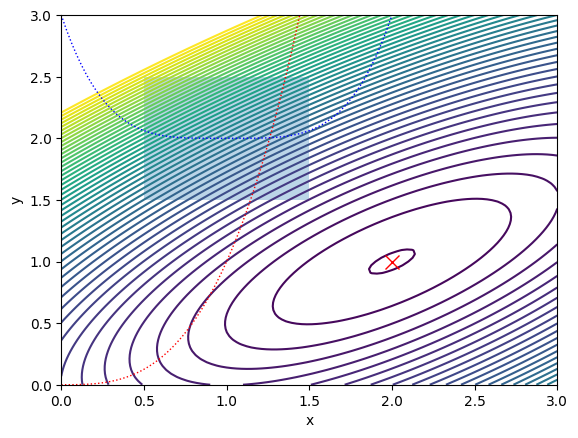

In [51]:
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 0.25));
plt.plot(x, x**3, 'r:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'b:', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(unc_opt.x[0], unc_opt.x[1], marker='x', ms=10, ls=None, color='red')

#axis([xmin, xmax, ymin, ymax])
plt.axis([0,3,0,3])

plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)

subject to the constraints:

$y = x^{3}$;

$y \ge (x-1)^{4}+2$

$x \in [0.5, 1.5]$

$y \in [1.5, 2.5]$

In [47]:
## Define constraints
#constrained passed as a dictionary with keys=type, func=function, jac=jacobian)

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [48]:
c_opt = sp.optimize.minimize(f, x0, bounds=bnds, constraints=cons)
c_opt

     fun: 2.04991547202353
     jac: array([-3.48747945,  5.49674523])
 message: 'Optimization terminated successfully'
    nfev: 19
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.26089314, 2.00463288])

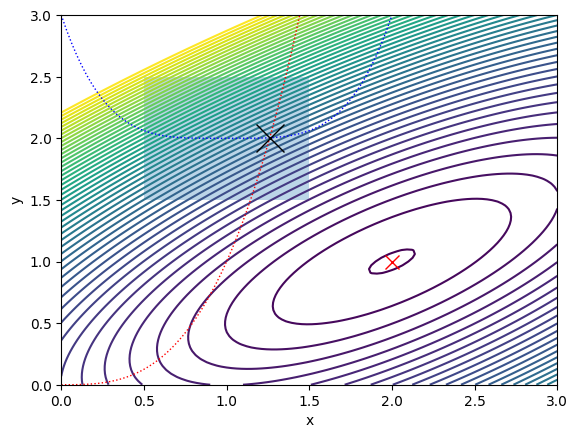

In [52]:
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 0.25));
plt.plot(x, x**3, 'r:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'b:', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(unc_opt.x[0], unc_opt.x[1], marker='x', ms=10, ls=None, color='red')
plt.plot(c_opt.x[0], c_opt.x[1], marker='x', ms=20, ls=None, color='k')

#axis([xmin, xmax, ymin, ymax])
plt.axis([0,3,0,3])

plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)

In [53]:
## Try more examples in scipy tutorial